<a href="https://colab.research.google.com/github/ayush-singh110/Customer-Segmentation-Using-Clustering/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [7]:
df.duplicated().sum()

np.int64(5268)

In [8]:
df['Country'].value_counts()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


<Axes: xlabel='Country'>

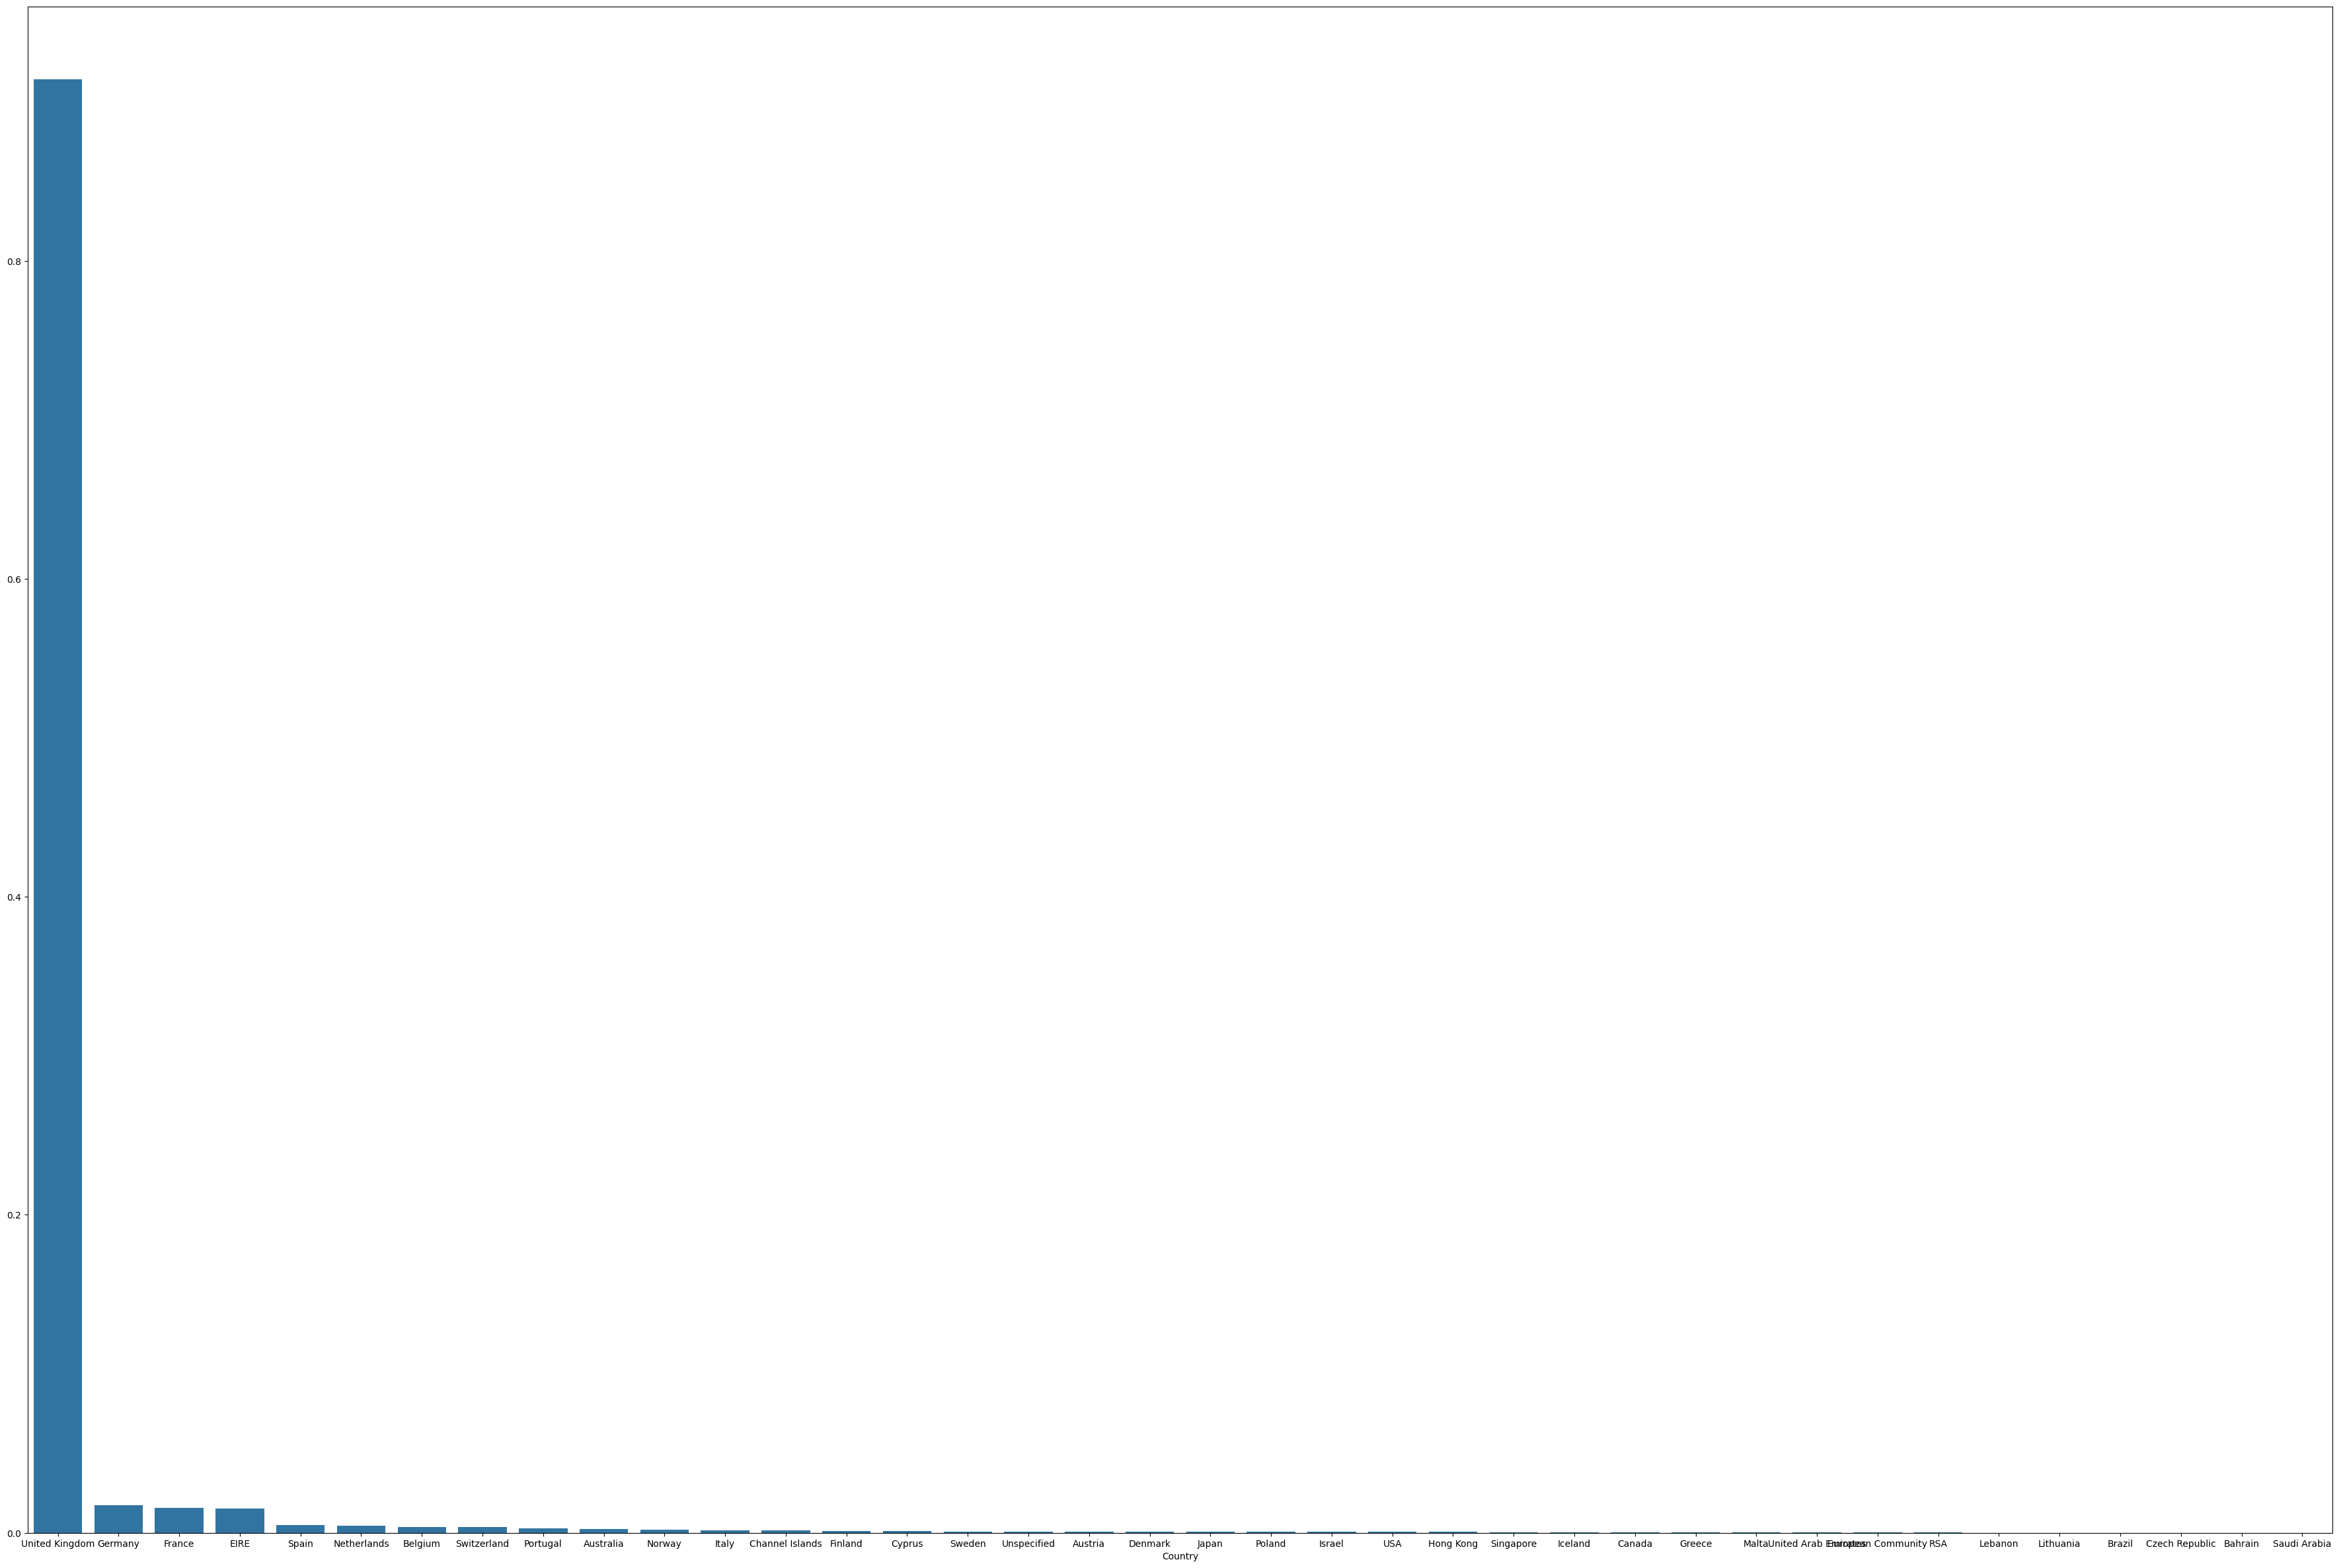

In [ ]:
l=df['Country'].value_counts(normalize=True)
plt.figure(figsize=(45,30))
sns.barplot(x=l.index,y=l.values)

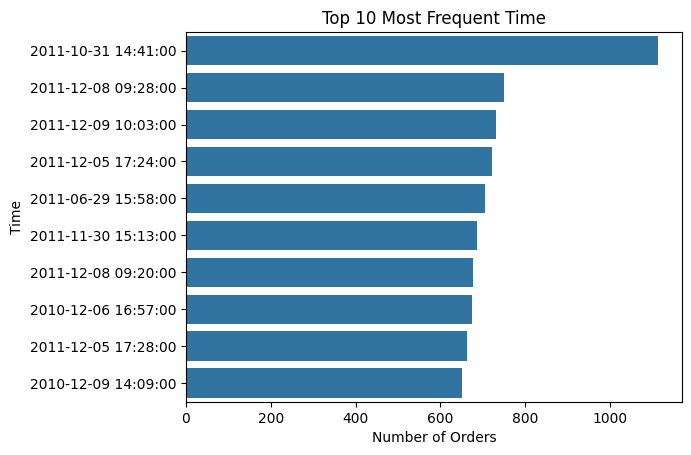

In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%Y-%m-%d.%f')
time_trend=df['InvoiceDate'].value_counts().head(10)
sns.barplot(x=time_trend.values,y=time_trend.index)
plt.title('Top 10 Most Frequent Time')
plt.xlabel('Number of Orders')
plt.ylabel('Time')
plt.show()

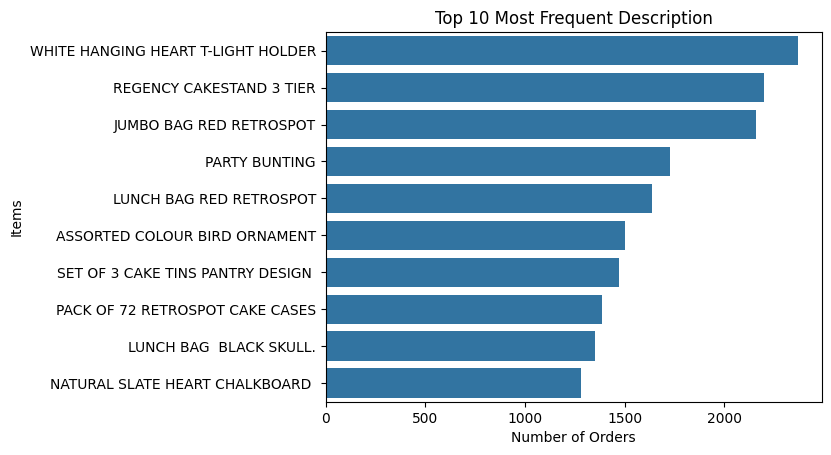

In [ ]:
description_count=df['Description'].value_counts().head(10)
sns.barplot(x=description_count.values,y=description_count.index)
plt.title('Top 10 Most Frequent Description')
plt.xlabel('Number of Orders')
plt.ylabel('Items')
plt.show()

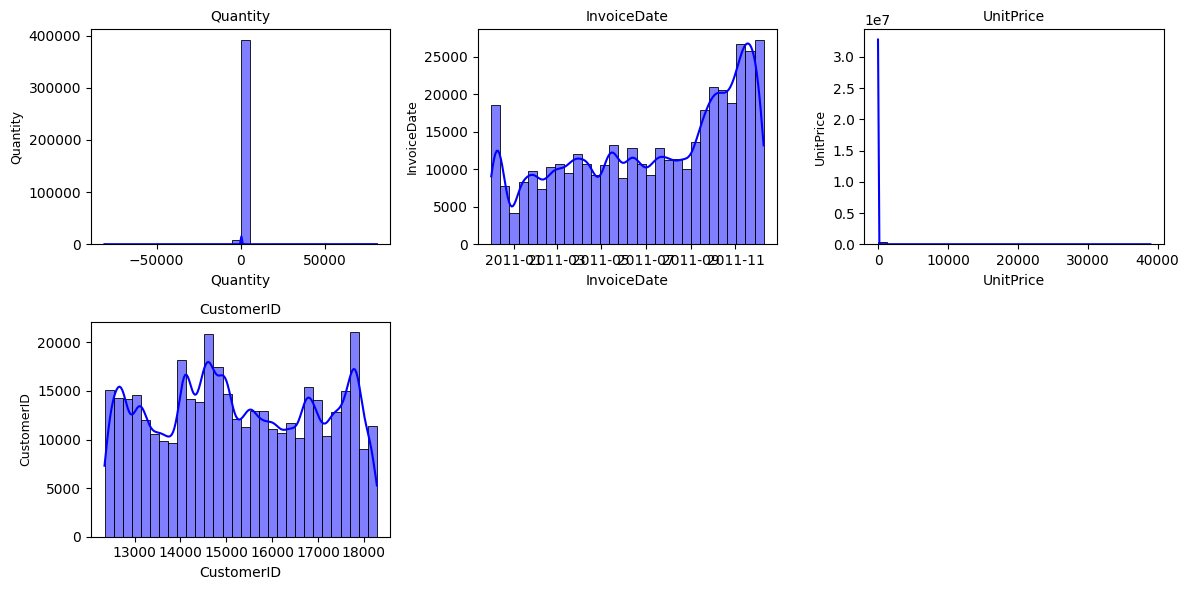

In [ ]:
numerical_columns=[feature for feature in df.columns if df[feature].dtypes!='O']
num_features=len(numerical_columns)
num_cols=3
num_rows=int(np.ceil(num_features/num_cols))
plt.figure(figsize=(num_cols*4,num_rows*3))
for i,feature in enumerate(numerical_columns):
    plt.subplot(num_rows,num_cols,i+1)
    sns.histplot(data=df,x=df[feature],bins=30,kde=True,color='blue')
    plt.title(f'{feature}',fontsize=10)
    plt.ylabel(feature,fontsize=9)
plt.tight_layout()
plt.show()

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


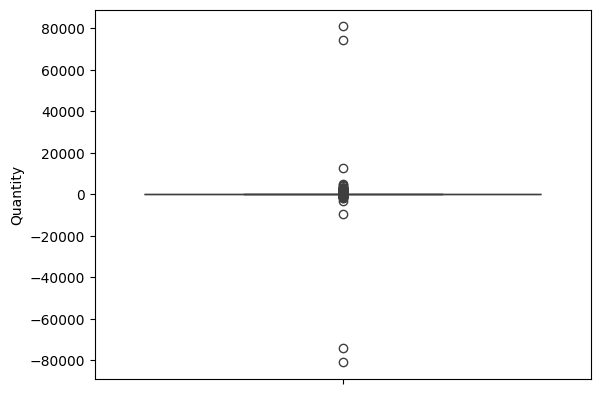

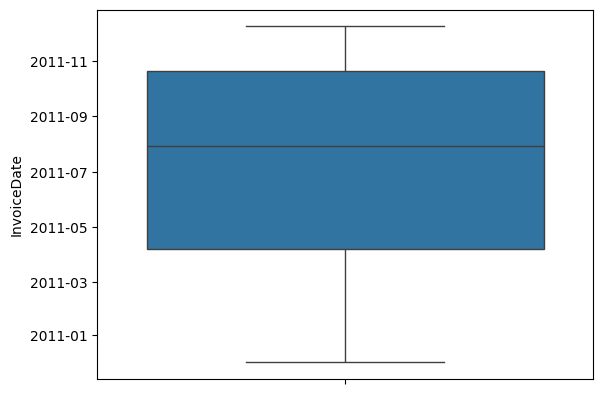

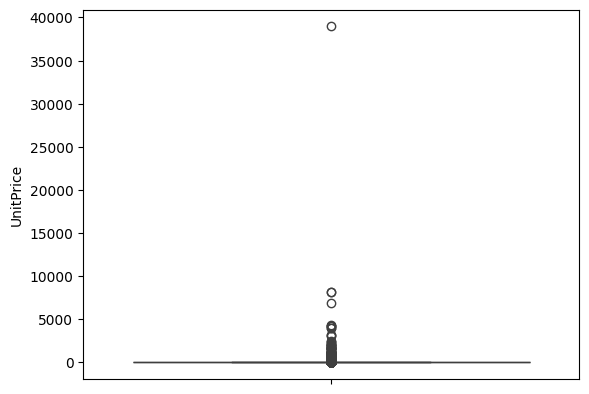

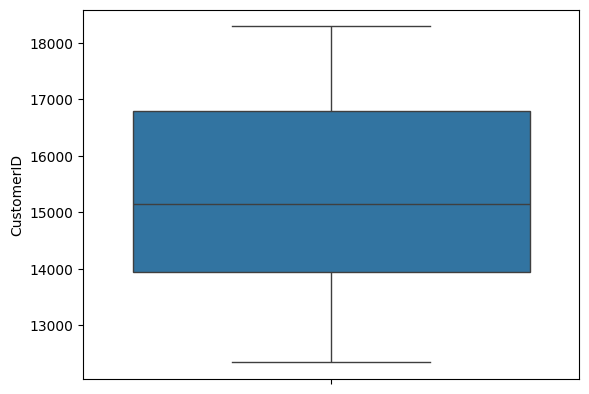

In [ ]:
for i in numerical_columns:
    sns.boxplot(df[i])
    plt.show()

In [11]:
q1=df['Quantity'].quantile(0.30)
q3=df['Quantity'].quantile(0.70)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
df=df.loc[(df['Quantity']<upper_limit)&(df['Quantity']>lower_limit)]
q1=df['UnitPrice'].quantile(0.25)
q3=df['UnitPrice'].quantile(0.65)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
df=df.loc[(df['UnitPrice']<upper_limit)&(df['UnitPrice']>lower_limit)]

In [12]:
X=df[['Quantity','UnitPrice','Country']].copy()
encoder=LabelEncoder()
X['Country']=encoder.fit_transform(X['Country'])

In [13]:
X['total_price']=X['Quantity']*X['UnitPrice']
X

,Quantity,UnitPrice,Country,total_price
0,6,2.55,35,15.30
1,6,3.39,35,20.34
2,8,2.75,35,22.00
3,6,3.39,35,20.34
4,6,3.39,35,20.34
...,...,...,...,...
541904,12,0.85,13,10.20
541905,6,2.10,13,12.60
541906,4,4.15,13,16.60
541907,4,4.15,13,16.60


<Axes: >

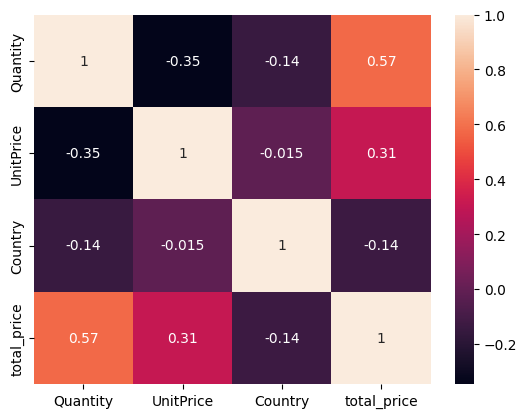

In [ ]:
sns.heatmap(X.corr(),annot=True)

In [14]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [18]:
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=42,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

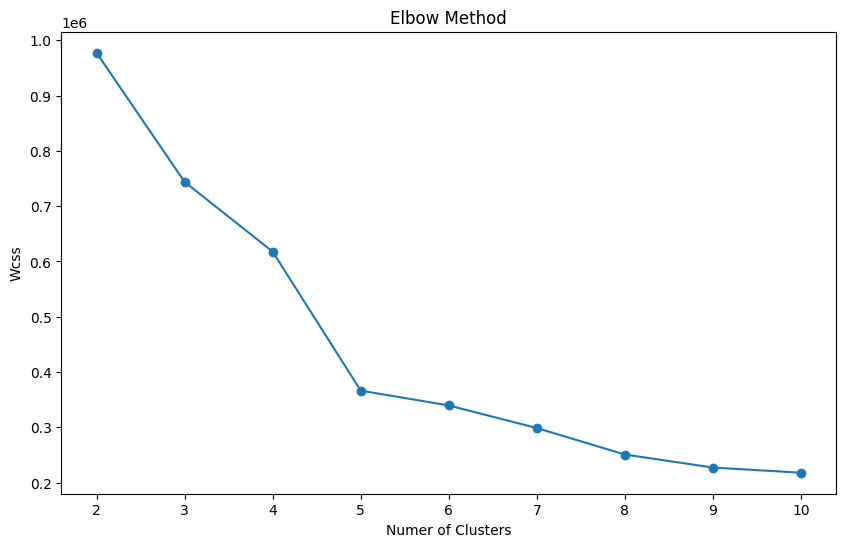

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(2,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Numer of Clusters')
plt.ylabel('Wcss')
plt.show()

In [24]:
kmeans=KMeans(n_clusters=5,random_state=42,init='k-means++')
df['Cluster']=kmeans.fit_predict(X)

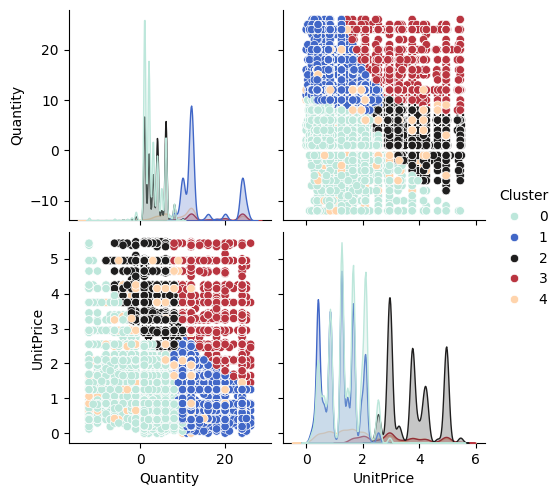

In [25]:
sns.pairplot(df,hue='Cluster',vars=['Quantity','UnitPrice'],palette='icefire')

In [28]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

Text(0, 0.5, 'PCA Component 2')

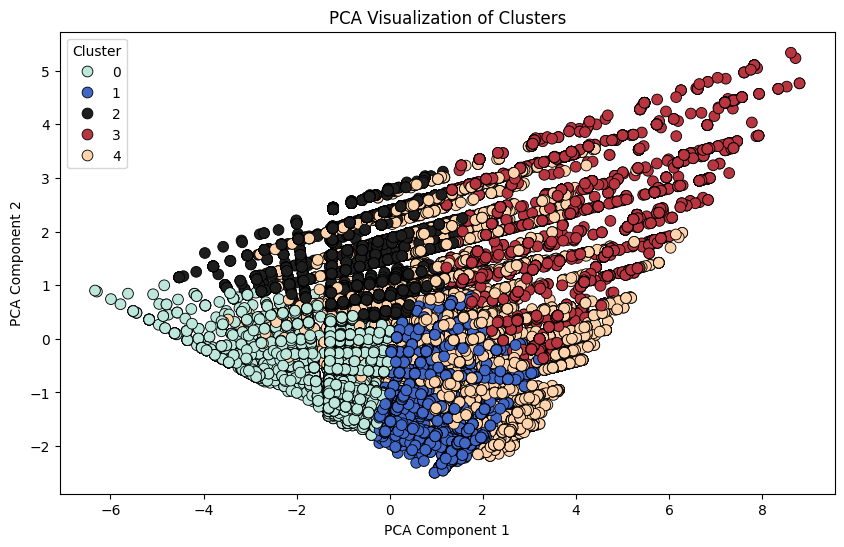

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=df['Cluster'],palette='icefire',s=60,edgecolor='k')
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')